#  National Parks Service's Species Data Analysis

In the context of this study, species are one or more populations of creatures that are reproductively similar and consist of a distinct form of animal or plant. As data scientist, we have been told to interpret data from the National Parks Service about endangered species in different parks.

## Goal

In this project, we are going to make some data analysis on the preservation conditions of the species and examine if there are any patterns or topics to the types of species that become endangered. 

During this project, we will analyze, prepare, and plot data to answer in a meaningful way some questions such as:

- What the distribution of endangered species on a category-by-category basis and by conservation status, over the entire dataset?
- What is the proportions of protected and not protected species are in the data?
- What category of species are most endangered?
- What is the statistical significance in the variations of the conservation status between species?
- Which species are the most endangered?
- Which Park count the highest number of endangered species?



## Action

- import python librairies
- load in the datasets
- Explore the datasets:
- visualize the data
- analyse the graphs

## Data

To develop this project, we got two csv files from [Codecademy](https://www.codecademy.com/paths/data-science/tracks/dsf-portfolio-project/modules/dscp-biodiversity-in-national-parks/kanban_projects/biodiversity-in-national-parks-portfolio-project): 
- The ```species_info.csv``` file  has 5824 rows and 4 column variables named ```'category'```, ```'scientific_name'```, ```'common_names'```, and ```'conservation_status'```.
- The ```observations.csv``` file has 23296 rows and 3 column variables named ```'scientific_name'```, ```'park_name'```, and ```'observations'```.



## Import Python Librairies
Let's start by importing  python librairies that will be used in this project:

In [1]:
# import python librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency
from scipy.stats import chi2

import string

## Load in the data

Secondly, we will load in the data.

In [2]:
#load in the species_infos dataset 
species = pd.read_csv("species_info.csv")

#load in the observations dataset 
observations = pd.read_csv("observations.csv")


## Explore the data

### Information about the species

In [3]:
#inspect few rows of the data
species.head(10)


,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN
5,Mammal,Odocoileus virginianus,White-Tailed Deer,NaN
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",NaN
7,Mammal,Canis latrans,Coyote,Species of Concern
8,Mammal,Canis lupus,Gray Wolf,Endangered
9,Mammal,Canis rufus,Red Wolf,Endangered


From this inspection, we can see that this table has no numerical column variable to summarize and there are missing data in the conservation_status column. Let's check more information.

In [4]:
#check information about the data
species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


**Check for inconsistencies and unexpected values in columns**

In [5]:
species['category'].unique()

array(['Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish', 'Vascular Plant',
       'Nonvascular Plant'], dtype=object)

In [6]:
species['conservation_status'].unique()

array([nan, 'Species of Concern', 'Endangered', 'Threatened',
       'In Recovery'], dtype=object)

In [7]:
#count the number of nan in 'conservation_status' column
num_na = species['conservation_status'].isna().sum()

print("The number of nan in 'conservation_status' column: ", num_na)

The number of nan in 'conservation_status' column:  5633


In [8]:
species['scientific_name'].unique()

array(['Clethrionomys gapperi gapperi', 'Bos bison', 'Bos taurus', ...,
       'Parthenocissus vitacea', 'Vitis californica',
       'Tribulus terrestris'], dtype=object)

In [9]:
len(species['scientific_name'].unique())

5541

In [10]:
species['common_names'].unique()

array(["Gapper's Red-Backed Vole", 'American Bison, Bison',
       'Aurochs, Aurochs, Domestic Cattle (Feral), Domesticated Cattle',
       ..., 'Thicket Creeper, Virginia Creeper, Woodbine',
       'California Grape, California Wild Grape',
       'Bullhead, Caltrop, Goathead, Mexican Sandbur, Puncture Vine, Texas Sandbur'],
      dtype=object)

As shown, there are some punctuations we have to get rid of from the 'common_names' column values.

**We can glean from thess outputs that:**

- **there are 5824 rows and 4 columns of specie_infos data.**
- **only the conservation_status column has important missing values : 5633**
- **there is no numerical column to summarize.**
- **there are 7 distinct categories of species in or data.**
- **there are some punctuations we have to get rid of from the 'common_names' column.**
- **Also we can see that 'category' and 'conservation_status' are categorical variables we may be interested for in our attempts to gouping data:**

**Strippring punctuation from a column values**

In [11]:
#Removing punctuations from the common_names related to the mammal category

def get_rid_of_punctuations(text):
    for character in string.punctuation:
        text = text.replace(character, '')
    return text

common_mammal_Names = species[species.category == "Mammal"]\
    .common_names\
    .apply(get_rid_of_punctuations)\
    .str.split().tolist()

#examine few rows of the transformations
common_mammal_Names[:5]

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison', 'Bison'],
 ['Aurochs',
  'Aurochs',
  'Domestic',
  'Cattle',
  'Feral',
  'Domesticated',
  'Cattle'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Sheep', 'Sheep', 'Feral'],
 ['Wapiti', 'Or', 'Elk']]

**Removing duplicate strings from the common_names related to the mammal category**

In [12]:
#get unduplicated rows
unduplicated= []

for string in common_mammal_Names:
    string = list(dict.fromkeys(string))
    unduplicated.append(string)
    
unduplicated[:5]

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison'],
 ['Aurochs', 'Domestic', 'Cattle', 'Feral', 'Domesticated'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Feral'],
 ['Wapiti', 'Or', 'Elk']]

#### Grouping species by category

In [13]:
print(species.groupby('category').size().sort_values(ascending=True))

category
Reptile                79
Amphibian              80
Fish                  127
Mammal                214
Nonvascular Plant     333
Bird                  521
Vascular Plant       4470
dtype: int64


**As we can see, Vascular plants are by far the largest portion of species with 4,470 in the data with reptiles being the smallest with 79.**

#### Filling missing values 

Now, let's convert the missing values in ```conservation_status``` to 'Unspecified' and summarize by conservation status.

In [14]:
species.fillna('not_specified', inplace=True)
# gouping by conservation_status
print(species.groupby("conservation_status").size().sort_values(ascending=True))

conservation_status
In Recovery              4
Threatened              10
Endangered              16
Species of Concern     161
not_specified         5633
dtype: int64


**As a result, we can see that there are 5,633 unspecified values which means that they are 5,633  species for  which no conservation status were known . In lieu of those with conservation status, there were clearly 161 species of concern, 16 endangered, 10 threatened, and 4 in recovery.**

### About the observations

In [15]:
#inspect few rows of the data
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [16]:
#check information about the data
observations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


In [17]:
observations.describe()

,observations
count,23296.000000
mean,142.287904
std,69.890532
min,9.000000
25%,86.000000
50%,124.000000
75%,195.000000
max,321.000000


From this output, we get a quick statistic of the observations.

In [18]:
#get the total number of observations
tot_num_obs = observations['observations'].sum()
print("The total number of observations is: ", tot_num_obs )

The total number of observations is:  3314739


Now, Let's check for unexpected values in columns.

In [19]:
observations['scientific_name'].unique()

array(['Vicia benghalensis', 'Neovison vison', 'Prunus subcordata', ...,
       'Ranunculus hebecarpus', 'Gulo gulo', 'Dichanthelium depauperatum'],
      dtype=object)

In [20]:
len(observations['scientific_name'].unique())

5541

In [21]:
observations.park_name.unique()

array(['Great Smoky Mountains National Park', 'Yosemite National Park',
       'Bryce National Park', 'Yellowstone National Park'], dtype=object)

**From these outputs, We can summarize that:**

- **there are 23296 rows in the observations data**
- **no column has missing values.**
- **the observations column is the numerical column to summarize: The total number of observations is:  3314739**
- **there are 5541 distinct scientific names of the species.**
- **the species are located in 4 distinct parks.**


## Data Analysis

**Here’s what’s happening with the data**

### What is the count of species, on a category-by-category basis, over the entire dataset?

If we were using the SQL query, our query would be:
```
SELECT category, COUNT(scientific_name)
FROM species
GROUP BY category
ORDER BY category;
```
Using the groupby clause, we will get an almost similar result with

```py
sc_by-category = species.groupby('category')['scientific_name'].count()
```

In [22]:
n_by_category = species.groupby('category')['scientific_name'].count()
n_by_category

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
Name: scientific_name, dtype: int64

### What is the count of species, on a category-by-category basis and by conservation status, over the entire dataset?

If we were using the SQL query, our query would be:
```
SELECT category, conservation_status, COUNT(scientific_name)
FROM species
GROUP BY category,conservation_status
ORDER BY category, conservation_status;
```
Using the groupby clause, we will get an almost similar result with

```py
n-by_category-conservation-status = species.groupby(['category','conservation_status'])['scientific_name'].count()
```

In [23]:
n_by_categCons = species.groupby(['category','conservation_status'])['scientific_name'].count()
n_by_categCons

category           conservation_status
Amphibian          Endangered                1
                   Species of Concern        4
                   Threatened                2
                   not_specified            73
Bird               Endangered                4
                   In Recovery               3
                   Species of Concern       72
                   not_specified           442
Fish               Endangered                3
                   Species of Concern        4
                   Threatened                4
                   not_specified           116
Mammal             Endangered                7
                   In Recovery               1
                   Species of Concern       28
                   Threatened                2
                   not_specified           176
Nonvascular Plant  Species of Concern        5
                   not_specified           328
Reptile            Species of Concern        5
                   no

Now, let's use ```unstack()``` also known as ```pivot``` to produce a DataFrame.

In [24]:
n_by_categCons.unstack()

conservation_status,Endangered,In Recovery,Species of Concern,Threatened,not_specified
category,,,,,
Amphibian,1.0,NaN,4.0,2.0,73.0
Bird,4.0,3.0,72.0,NaN,442.0
Fish,3.0,NaN,4.0,4.0,116.0
Mammal,7.0,1.0,28.0,2.0,176.0
Nonvascular Plant,NaN,NaN,5.0,NaN,328.0
Reptile,NaN,NaN,5.0,NaN,74.0
Vascular Plant,1.0,NaN,43.0,2.0,4424.0


In [25]:
n_by_categCons.unstack().columns

Index(['Endangered', 'In Recovery', 'Species of Concern', 'Threatened',
       'not_specified'],
      dtype='object', name='conservation_status')

### Checking the statistical signifiance of the distribtion

In [26]:
n_by_categConstatus = species.groupby(['category','conservation_status'], as_index=False)['scientific_name'].count()
n_by_categConstatus

,category,conservation_status,scientific_name
0,Amphibian,Endangered,1
1,Amphibian,Species of Concern,4
2,Amphibian,Threatened,2
3,Amphibian,not_specified,73
4,Bird,Endangered,4
5,Bird,In Recovery,3
6,Bird,Species of Concern,72
7,Bird,not_specified,442
8,Fish,Endangered,3
9,Fish,Species of Concern,4


In [27]:
is_specified = n_by_categConstatus.loc[n_by_categConstatus['conservation_status']!= 'not_specified']
is_specified

,category,conservation_status,scientific_name
0,Amphibian,Endangered,1
1,Amphibian,Species of Concern,4
2,Amphibian,Threatened,2
4,Bird,Endangered,4
5,Bird,In Recovery,3
6,Bird,Species of Concern,72
8,Fish,Endangered,3
9,Fish,Species of Concern,4
10,Fish,Threatened,4
12,Mammal,Endangered,7


[Text(0.5, 0, 'The Species Conservation Status'),
 Text(0, 0.5, 'Count of Scientific Names'),
 Text(0.5, 1.0, 'The conversation status of species category-by-category basis')]

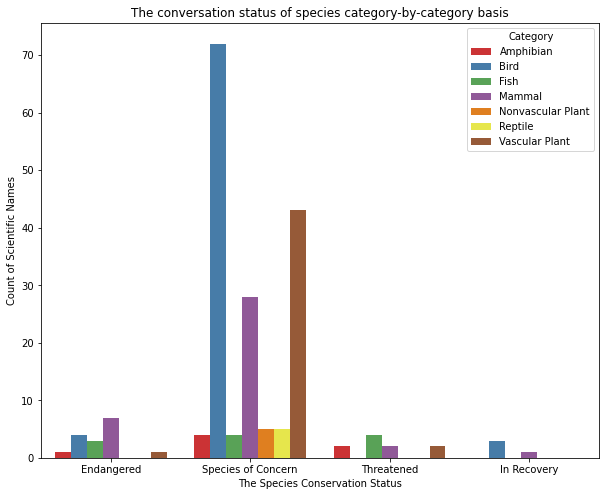

In [28]:
plt.figure(figsize=(10,8))
ax = sns.barplot(x="conservation_status", y="scientific_name", hue="category",
                 data=is_specified,  palette="Set1")
plt.legend(title='Category', loc='upper right')
#specfiy axis labels
ax.set(xlabel='The Species Conservation Status',
       ylabel='Count of Scientific Names',
       title='The conversation status of species category-by-category basis')

This chart shows the conservation status of species on category-by-category basis. It includes the largest population of endangered species which was in mammal category with seven distinct scientific names. The bird category counted the second largest endangered species with four distinct scientific names, and followed by the fish category with three distinct scientific names. The Amphibian and the Vascular Plant came at last with one endangered specie repectively.

In [29]:
df = n_by_categCons.unstack()[['Endangered', 'In Recovery', 'Species of Concern', 'Threatened']]
df

conservation_status,Endangered,In Recovery,Species of Concern,Threatened
category,,,,
Amphibian,1.0,NaN,4.0,2.0
Bird,4.0,3.0,72.0,NaN
Fish,3.0,NaN,4.0,4.0
Mammal,7.0,1.0,28.0,2.0
Nonvascular Plant,NaN,NaN,5.0,NaN
Reptile,NaN,NaN,5.0,NaN
Vascular Plant,1.0,NaN,43.0,2.0


In [30]:
df = df.groupby(level=["category"]).sum()
df['is_protected'] = df['Endangered'] + df['In Recovery'] + df['Species of Concern'] + df['Threatened']
df

conservation_status,Endangered,In Recovery,Species of Concern,Threatened,is_protected
category,,,,,
Amphibian,1.0,0.0,4.0,2.0,7.0
Bird,4.0,3.0,72.0,0.0,79.0
Fish,3.0,0.0,4.0,4.0,11.0
Mammal,7.0,1.0,28.0,2.0,38.0
Nonvascular Plant,0.0,0.0,5.0,0.0,5.0
Reptile,0.0,0.0,5.0,0.0,5.0
Vascular Plant,1.0,0.0,43.0,2.0,46.0


In [31]:
dFrame = n_by_categCons.unstack()
dFrame = dFrame.groupby(level=["category"]).sum()
dFrame['is_protected'] = dFrame['Endangered'] + dFrame['In Recovery'] + dFrame['Species of Concern'] + dFrame['Threatened']
dFrame

conservation_status,Endangered,In Recovery,Species of Concern,Threatened,not_specified,is_protected
category,,,,,,
Amphibian,1.0,0.0,4.0,2.0,73.0,7.0
Bird,4.0,3.0,72.0,0.0,442.0,79.0
Fish,3.0,0.0,4.0,4.0,116.0,11.0
Mammal,7.0,1.0,28.0,2.0,176.0,38.0
Nonvascular Plant,0.0,0.0,5.0,0.0,328.0,5.0
Reptile,0.0,0.0,5.0,0.0,74.0,5.0
Vascular Plant,1.0,0.0,43.0,2.0,4424.0,46.0


In [32]:
category_stat = dFrame[['is_protected', 'not_specified']]
category_stat 

conservation_status,is_protected,not_specified
category,,
Amphibian,7.0,73.0
Bird,79.0,442.0
Fish,11.0,116.0
Mammal,38.0,176.0
Nonvascular Plant,5.0,328.0
Reptile,5.0,74.0
Vascular Plant,46.0,4424.0


In [33]:
category_stat = category_stat.copy() 
category_stat['percent_protected'] = category_stat['is_protected'] * 100 /\
        ( category_stat['is_protected'] + category_stat['not_specified'])
category_stat 

conservation_status,is_protected,not_specified,percent_protected
category,,,
Amphibian,7.0,73.0,8.750000
Bird,79.0,442.0,15.163148
Fish,11.0,116.0,8.661417
Mammal,38.0,176.0,17.757009
Nonvascular Plant,5.0,328.0,1.501502
Reptile,5.0,74.0,6.329114
Vascular Plant,46.0,4424.0,1.029083


In [34]:
#get the proportion of protected species
percent_tot_protected = category_stat['is_protected'].sum() * 100/\
        ( category_stat['is_protected'].sum() + category_stat['not_specified'].sum())
percent_tot_protected

3.279532967032967

In [35]:
#get the proportion of not protected species
percent_tot_not_specified = category_stat['not_specified'].sum() * 100/\
        ( category_stat['is_protected'].sum() + category_stat['not_specified'].sum())
percent_tot_not_specified

96.72046703296704

#### Chi-squared test with similar proportions

The Pearson’s chi-squared test for independence can be calculated in Python using the [chi2_contingency() SciPy function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html).

The function takes an array as input representing the contingency table for the two categorical variables. It returns the calculated statistic and p-value for interpretation as well as the calculated degrees of freedom and table of expected frequencies.
```py
stat, p, dof, expected = chi2_contingency(table)
```
We can interpret the statistic by retrieving the [critical value](https://machinelearningmastery.com/critical-values-for-statistical-hypothesis-testing/) from the chi-squared distribution for the probability and number of degrees of freedom.

For example, a probability of 95% can be used, suggesting that the finding of the test is quite likely given the assumption of the test that the variable is independent. If the statistic is less than or equal to the critical value, we can fail to reject this assumption, otherwise it can be rejected.

We can interpret the test statistic in the context of the chi-squared distribution with the requisite number of degress of freedom as follows:

- **If Statistic >= Critical Value:** significant result, reject null hypothesis (H0), dependent.
- **If Statistic < Critical Value:** not significant result, fail to reject null hypothesis (H0), independent.

**The degrees of freedom (dof)** for the chi-squared distribution is calculated based on the size of the contingency table as:

```py
degrees of freedom: (rows - 1) * (cols - 1)
```
In terms of a p-value and a chosen significance level (alpha), the test can be interpreted as follows:

- **If p-value <= alpha:** significant result, reject null hypothesis (H0), dependent.
- **If p-value > alpha:** not significant result, fail to reject null hypothesis (H0), independent.

A contingency table is defined below that has a different number of observations for each population (row), but a similar proportion across each group (column). Given the similar proportions, we would expect the test to find that the groups are similar and that the variables are independent (fail to reject the null hypothesis, or H0).

In [36]:
# contingency table: [[mammal], [bird]]
table = [[38, 116],
         [79,  442]]
print(table)
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

[[38, 116], [79, 442]]
dof=1
[[ 26.69333333 127.30666667]
 [ 90.30666667 430.69333333]]
probability=0.950, critical=3.841, stat=6.857
Dependent (reject H0)
significance=0.050, p=0.009
Dependent (reject H0)


In [37]:
# contingency table: [[reptile], [bird]]
table = [[5, 74],
         [79,  442]]
print(table)
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

[[5, 74], [79, 442]]
dof=1
[[ 11.06  67.94]
 [ 72.94 448.06]]
probability=0.950, critical=3.841, stat=3.743
Independent (fail to reject H0)
significance=0.050, p=0.053
Independent (fail to reject H0)


In [38]:
# contingency table: [[mammal], [reptile]]
table = [[38, 116],
         [5,  74]]
print(table)
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

[[38, 116], [5, 74]]
dof=1
[[ 28.42060086 125.57939914]
 [ 14.57939914  64.42060086]]
probability=0.950, critical=3.841, stat=10.491
Dependent (reject H0)
significance=0.050, p=0.001
Dependent (reject H0)


In [39]:
# contingency table: [[reptile], [bird], [mammal]]
table = [[5, 74],
         [79,  442],
        [38, 116]]
print(table)
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

[[5, 74], [79, 442], [38, 116]]
dof=2
[[ 12.78249337  66.21750663]
 [ 84.29973475 436.70026525]
 [ 24.91777188 129.08222812]]
probability=0.950, critical=5.991, stat=14.245
Dependent (reject H0)
significance=0.050, p=0.001
Dependent (reject H0)


This section will run some chi-squared tests to see if different species have statistically significant differences in conservation status rates. In order to run a chi squared test, a contingency table will need to be created. The contingency table should look like this:

protected	not protected
Mammal	?	?
Bird	?	?
The first test will be called contingency1 and will need to be filled with the correct numbers for mammals and birds.

The results from the chi-squared test returns many values, the second value which is 0.69 is the p-value. The standard p-value to test statistical significance is 0.05. For the value retrieved from this test, the value of 0.69 is much larger than 0.05. In the case of mammals and birds there doesn't seem to be any significant relationship between them i.e. the variables independent.

### Analyzing the record findings of the species

The unduplicated list of mammal common names we prevously got was a list of lists. To be able to use it easely, we will flatten it and count the number of occurences of each word of that list.

In [40]:
flatten_list = [element for sublist in unduplicated for element in sublist]
flatten_list[:7]

['Gappers', 'RedBacked', 'Vole', 'American', 'Bison', 'Aurochs', 'Domestic']

Next, we will check the distribution of the mammal common names. To do so, we will pandas's ```DataFrame``` and its ```set()``` to count distint words of the flatten_list.

In [41]:
data =[]
for word in flatten_list:
    word_num_occurences = flatten_list.count(word)
    data.append((word, word_num_occurences))
    
df = pd.DataFrame(set(data), columns=['Word','Count']).sort_values('Count', ascending=False)
df.head(12)

,Word,Count
152,Bat,23
168,Shrew,18
106,Myotis,17
177,Mouse,16
58,Chipmunk,13
61,Squirrel,12
112,American,12
13,Eastern,11
202,Vole,11
96,Mountain,10


As a result, we can see that the word 'Bat' has the largest row count which means that there are several different species which scientific names include the word 'Bat'. Therefore, our next step is to look up rows of species that are referring to bats. A new lookup column variable named ```is_bat``` made up of boolean values will be intorduced to check whether its rows refer to bat.

In [42]:
species['is_protected'] = species.conservation_status != 'not_specified'

species['is_bat'] = species['common_names'].str.contains(r"\bBat\b", regex = True)

species.head(12)

,category,scientific_name,common_names,conservation_status,is_protected,is_bat
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,not_specified,False,False
1,Mammal,Bos bison,"American Bison, Bison",not_specified,False,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",not_specified,False,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",not_specified,False,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,not_specified,False,False
5,Mammal,Odocoileus virginianus,White-Tailed Deer,not_specified,False,False
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",not_specified,False,False
7,Mammal,Canis latrans,Coyote,Species of Concern,True,False
8,Mammal,Canis lupus,Gray Wolf,Endangered,True,False
9,Mammal,Canis rufus,Red Wolf,Endangered,True,False


In [43]:
#get a subframe with common_names containing 'Bat'
batFrame = species[species['is_bat']]
batFrame

,category,scientific_name,common_names,conservation_status,is_protected,is_bat
28,Mammal,Corynorhinus rafinesquii,Rafinesque's Big-Eared Bat,not_specified,False,True
29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern,True,True
30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern,True,True
31,Mammal,Lasiurus borealis,"Eastern Red Bat, Red Bat",not_specified,False,True
32,Mammal,Lasiurus cinereus,Hoary Bat,not_specified,False,True
36,Mammal,Myotis leibii,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
37,Mammal,Myotis lucifugus,"Little Brown Bat, Little Brown Myotis",Species of Concern,True,True
38,Mammal,Myotis septentrionalis,"Northern Long-Eared Bat, Northern Myotis",Threatened,True,True
39,Mammal,Myotis sodalis,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True
40,Mammal,Nycticeius humeralis,Evening Bat,not_specified,False,True


Now, let's merge `batFrame` with `observations` to create a new `DataFrame` with observations of bats across the four national parks.  

In [44]:
batObsFrame = observations.merge(batFrame)
batObsFrame

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected,is_bat
0,Lasiurus blossevillii,Bryce National Park,113,Mammal,Western Red Bat,Species of Concern,True,True
1,Lasiurus blossevillii,Great Smoky Mountains National Park,70,Mammal,Western Red Bat,Species of Concern,True,True
2,Lasiurus blossevillii,Yosemite National Park,123,Mammal,Western Red Bat,Species of Concern,True,True
3,Lasiurus blossevillii,Yellowstone National Park,221,Mammal,Western Red Bat,Species of Concern,True,True
4,Corynorhinus rafinesquii,Yosemite National Park,188,Mammal,Rafinesque's Big-Eared Bat,not_specified,False,True
...,...,...,...,...,...,...,...,...
139,Myotis sodalis,Yellowstone National Park,68,Mammal,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True
140,Myotis leibii,Yosemite National Park,132,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
141,Myotis leibii,Bryce National Park,84,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
142,Myotis leibii,Great Smoky Mountains National Park,49,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True


Next, let's see what the count of observations, on a park-by-park basis, over batObsFrame is.

In [45]:
obs_in_park_count = batObsFrame.groupby('park_name').observations.sum().reset_index()
obs_in_park_count

,park_name,observations
0,Bryce National Park,3433
1,Great Smoky Mountains National Park,2411
2,Yellowstone National Park,8362
3,Yosemite National Park,4786


Also, let's summarize the observations of the protected bats on a park-by-park basis

In [46]:
protected_obs_in_park_count = batObsFrame.groupby(['park_name','is_protected']).observations.sum().reset_index()
protected_obs_in_park_count

,park_name,is_protected,observations
0,Bryce National Park,False,1596
1,Bryce National Park,True,1837
2,Great Smoky Mountains National Park,False,1299
3,Great Smoky Mountains National Park,True,1112
4,Yellowstone National Park,False,4044
5,Yellowstone National Park,True,4318
6,Yosemite National Park,False,2345
7,Yosemite National Park,True,2441


[Text(0.5, 0, 'National Park Names'),
 Text(0, 0.5, 'Bat Observations'),
 Text(0.5, 1.0, 'Bat observations over National Parks')]

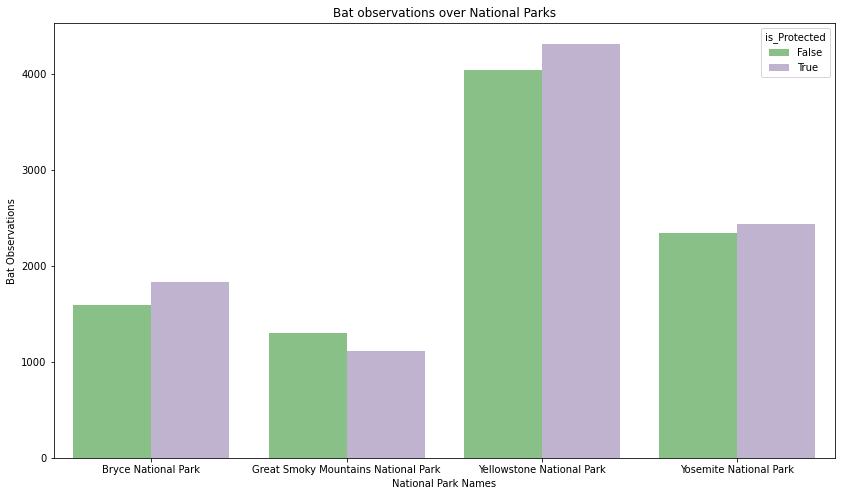

In [47]:
plt.figure(figsize=(14,8))
ax = sns.barplot(x="park_name", y="observations", hue="is_protected",
                 data=protected_obs_in_park_count,  palette="Accent")
plt.legend(title='is_Protected', loc='upper right')
#specfiy axis labels
ax.set(xlabel='National Park Names',
       ylabel='Bat Observations',
       title='Bat observations over National Parks')

In [48]:
species['is_shrew'] = species['common_names'].str.contains(r"\bShrew\b", regex = True)
species.head(10)

,category,scientific_name,common_names,conservation_status,is_protected,is_bat,is_shrew
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,not_specified,False,False,False
1,Mammal,Bos bison,"American Bison, Bison",not_specified,False,False,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",not_specified,False,False,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",not_specified,False,False,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,not_specified,False,False,False
5,Mammal,Odocoileus virginianus,White-Tailed Deer,not_specified,False,False,False
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",not_specified,False,False,False
7,Mammal,Canis latrans,Coyote,Species of Concern,True,False,False
8,Mammal,Canis lupus,Gray Wolf,Endangered,True,False,False
9,Mammal,Canis rufus,Red Wolf,Endangered,True,False,False


In [49]:
#get a subframe with common_names containing 'Bat'
shrewFrame = species[species['is_shrew']]
shrewFrame

,category,scientific_name,common_names,conservation_status,is_protected,is_bat,is_shrew
79,Mammal,Blarina brevicauda,"Northern Short Tailed Shrew, Northern Short-Ta...",not_specified,False,False,True
80,Mammal,Cryptotis parva,Least Shrew,not_specified,False,False,True
81,Mammal,Sorex cinereus,"Common Shrew, Masked Shrew",not_specified,False,False,True
82,Mammal,Sorex dispar,"Long-Tailed Or Rock Shrew, Long-Tailed Shrew",not_specified,False,False,True
83,Mammal,Sorex fumeus,Smoky Shrew,not_specified,False,False,True
84,Mammal,Sorex hoyi,Pygmy Shrew,not_specified,False,False,True
85,Mammal,Sorex longirostris,Southeastern Shrew,not_specified,False,False,True
86,Mammal,Sorex palustris,Water Shrew,not_specified,False,False,True
3071,Mammal,Sorex cinereus,"Cinereus Shrew, Common Shrew, Masked Shrew",not_specified,False,False,True
3072,Mammal,Sorex hoyi,"American Pygmy Shrew, Pygmy Shrew",not_specified,False,False,True


Now, let's merge `shrewFrame` with `observations` to create a new `DataFrame` with observations of shrews across the four national parks.  

In [50]:
shrewObsFrame = observations.merge(shrewFrame)
shrewObsFrame 

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected,is_bat,is_shrew
0,Blarina brevicauda,Bryce National Park,77,Mammal,"Northern Short Tailed Shrew, Northern Short-Ta...",not_specified,False,False,True
1,Blarina brevicauda,Great Smoky Mountains National Park,86,Mammal,"Northern Short Tailed Shrew, Northern Short-Ta...",not_specified,False,False,True
2,Blarina brevicauda,Yellowstone National Park,244,Mammal,"Northern Short Tailed Shrew, Northern Short-Ta...",not_specified,False,False,True
3,Blarina brevicauda,Yosemite National Park,185,Mammal,"Northern Short Tailed Shrew, Northern Short-Ta...",not_specified,False,False,True
4,Sorex monticolus,Yellowstone National Park,252,Mammal,Dusky Shrew,not_specified,False,False,True
...,...,...,...,...,...,...,...,...,...
99,Sorex nanus,Yellowstone National Park,216,Mammal,"Dwarf Shrew, Rocky Mountain Dwarf Shrew",not_specified,False,False,True
100,Sorex preblei,Great Smoky Mountains National Park,59,Mammal,"Malheur Shrew, Preble's Shrew",Species of Concern,True,False,True
101,Sorex preblei,Bryce National Park,71,Mammal,"Malheur Shrew, Preble's Shrew",Species of Concern,True,False,True
102,Sorex preblei,Yosemite National Park,140,Mammal,"Malheur Shrew, Preble's Shrew",Species of Concern,True,False,True


Next, let's see what the count of observations, on a park-by-park basis, over batObsFrame is.

In [51]:
shrew_obs_in_park_count = shrewObsFrame.groupby('park_name').observations.sum().reset_index()
shrew_obs_in_park_count

,park_name,observations
0,Bryce National Park,2655
1,Great Smoky Mountains National Park,1808
2,Yellowstone National Park,6739
3,Yosemite National Park,3814


Also, let's summarize the observations of the protected shrews on a park-by-park basis.

In [52]:
shrew_protected_obs_in_park_count = shrewObsFrame.groupby(['park_name','is_protected']).observations.sum().reset_index()
shrew_protected_obs_in_park_count

,park_name,is_protected,observations
0,Bryce National Park,False,2584
1,Bryce National Park,True,71
2,Great Smoky Mountains National Park,False,1749
3,Great Smoky Mountains National Park,True,59
4,Yellowstone National Park,False,6546
5,Yellowstone National Park,True,193
6,Yosemite National Park,False,3674
7,Yosemite National Park,True,140


[Text(0.5, 0, 'National Park Names'),
 Text(0, 0.5, 'Shrew Observations'),
 Text(0.5, 1.0, 'Shrew observations over National Parks')]

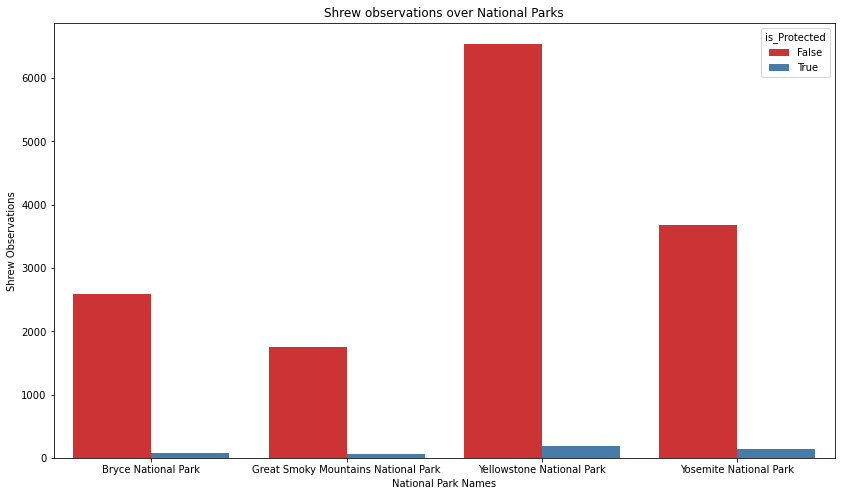

In [53]:
plt.figure(figsize=(14,8))
ax = sns.barplot(x="park_name", y="observations", hue="is_protected",
                 data=shrew_protected_obs_in_park_count,  palette="Set1")
plt.legend(title='is_Protected', loc='upper right')
#specfiy axis labels
ax.set(xlabel='National Park Names',
       ylabel='Shrew Observations',
       title='Shrew observations over National Parks')

## Conclusion

To sum up, this project gave opportunity to analyze biodiversity data from the National Parks Service, particularly around various species observed in different national park locations.

Also, it gave context to clean up, and plot data as well as answer questions posed in starting.

- What the distribution of endangered species on a category-by-category basis and by conservation status, over the entire dataset?
    - Amphibian count 1 scientific name
    - Bird count 4 scientific names, 
    - Fish count 3 scientific names
    - Mammals count 7 scientific names, 
    - Vascular Plant count 1 scientific names
- What is the proportions of protected and not protected species are in the data?
    - 3,28% of the species were protected;
    - 96,72% of the species were protected;
- What category of species are most endangered?
    - The mammal category was the largest population of endangered species with seven distinct scientific names; 
    - The bird category counted the second largest endangered species with four distinct scientific names;
    - and followed by the fish category with three distinct scientific names;
    - The Amphibian and the Vascular Plant came at last with one endangered specie repectively.

- What is the statistical significance in the variations of the conservation status between species?
    - The mammals and birds did not have significant difference in conservation percentage, 
    - The reptiles and bird revealed a statistically significant difference in conservation percentage.
    - Together  mammals, birds, and reptiles did not have significant difference in conservation percentage.
- Which Park count the highest number of endangered species?
    - The research observed that bats struck the greatest number of times, and they were most likely to be found in Yellowstone National Park.
    - The second largest observation was the shrew ‘observation, and also, they were likely to be found in Yellowstone National Park.
